**문제정의 (Problem Define)**
오렌지 품질을 결정하는 다양한 요소를 살펴보고 품질을 결정하고, 예측할 수 있는 다양한 머신러닝 알고리즘을 사용하여 분류 및 예측을 수행하여 본다.

**1. 라이브러리 불러오기**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
# from rotation_forest import RotationForestClassifier

# 추가로 머신러닝 모델을 돌리기 위한 문장을 import합니다.
# Decision Tree RotationForest RandomForest 등

**2. 데이터 수집하기**

In [ ]:
df = pd.read_csv('/content/Orange Quality Data.csv')

In [ ]:
#데이터셋을 불러와서 첫 세 줄을 출력하여 데이터의 구성을 살펴봅니다.
df.head(3)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0


변수 의미
- Size (cm): 과일의 크기
- Weight (g): 과일의 무게
- Brix (Sweetness): 과일의 단맛
- pH (Acidity): 과일의 산도
- Softness (1-5): 과일의 부드러운 정도
- HarvestTime (days): 과일 수확 시기
- Ripeness (1-5): 과일의 숙성 정도
- Color: 과일의 색상
- Variety: 과일의 다양성 (품종)
- Blemishes (Y/N): 과일의 흠집
- Quality (1-5): 최종 과일의 품질


**3. 탐색적 분석(EDA)**



In [ ]:
### 데이터 셋 구조 보기
df.shape

(241, 11)

In [ ]:
### 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [ ]:
### 결측치 확인
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [ ]:
### 통계치 확인
### 숫자형 변수만 뽑아서 기본 통계를 해본다.
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [ ]:
### 범주형 변수 확인(색상)
num_color=df['Color'].unique()
print(len(num_color))
num_color

5


array(['Orange', 'Deep Orange', 'Light Orange', 'Orange-Red',
       'Yellow-Orange'], dtype=object)

오렌지의 색상은 Orange, Deep Orange, Light Orange, Orange-Red, Yellow-Orange 총 5가지 종류가 있음을 확인

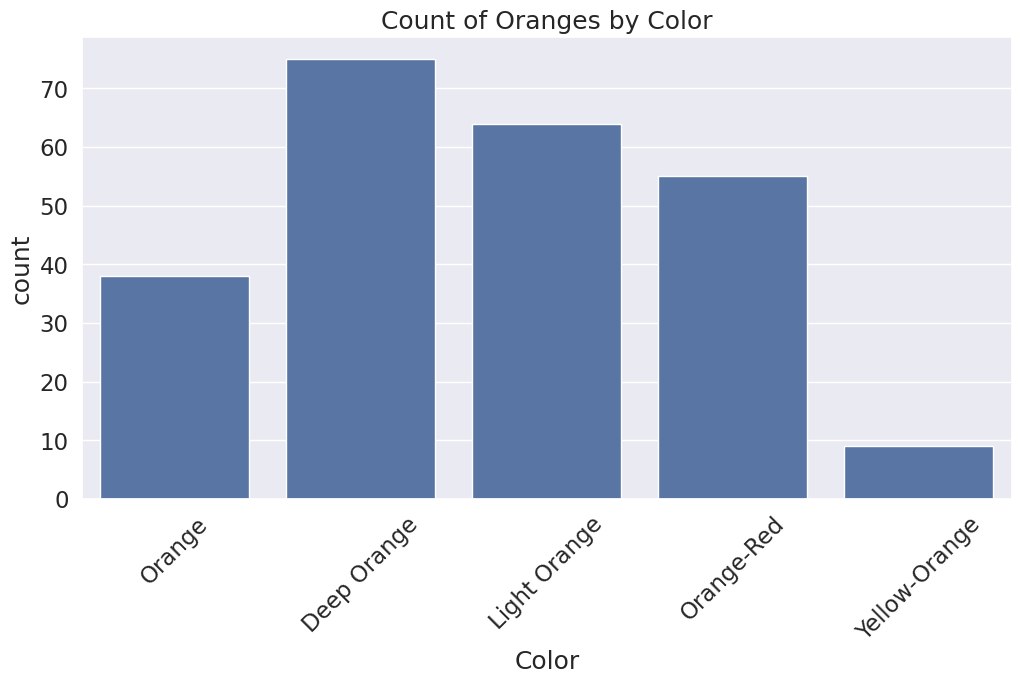

In [ ]:
### 오렌지 색상 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x="Color", data=df)
plt.title("Count of Oranges by Color")
plt.xticks(rotation=45)
plt.show()

In [ ]:
### 범주형 변수 확인(품종)
num_variety=df['Variety'].unique()
print(len(num_variety))
num_variety

24


array(['Valencia', 'Navel', 'Cara Cara', 'Blood Orange', 'Hamlin',
       'Tangelo (Hybrid)', 'Murcott (Hybrid)', 'Moro (Blood)', 'Jaffa',
       'Clementine', 'Washington Navel', 'Star Ruby', 'Tangerine',
       'Ambiance', 'California Valencia', 'Honey Tangerine',
       'Navel (Late Season)', 'Clementine (Seedless)', 'Temple',
       'Minneola (Hybrid)', 'Satsuma Mandarin', 'Midsweet (Hybrid)',
       'Navel (Early Season)', 'Ortanique (Hybrid)'], dtype=object)

오렌지 품종은 약 24가지로 나눌 수 있음을 확인

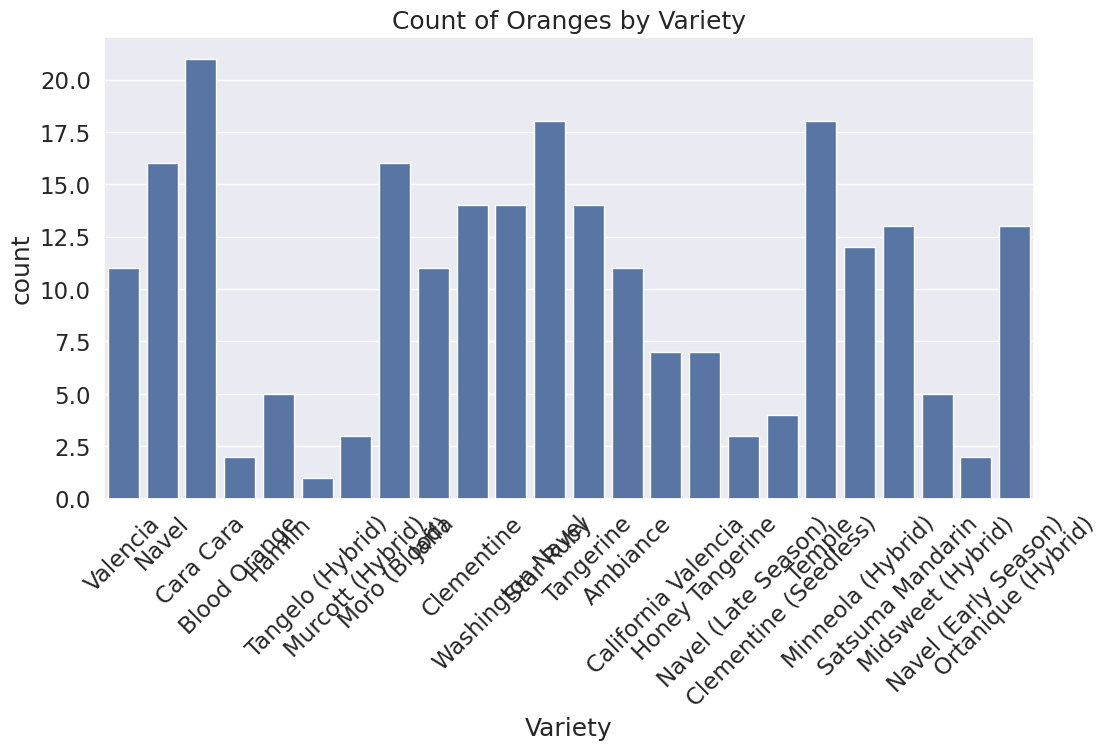

In [ ]:
### 오렌지 품종 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x="Variety", data=df)
plt.title("Count of Oranges by Variety")
plt.xticks(rotation=45)
plt.show()

컬럼 특성 확인

<ipython-input-150-2be993e7f352>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


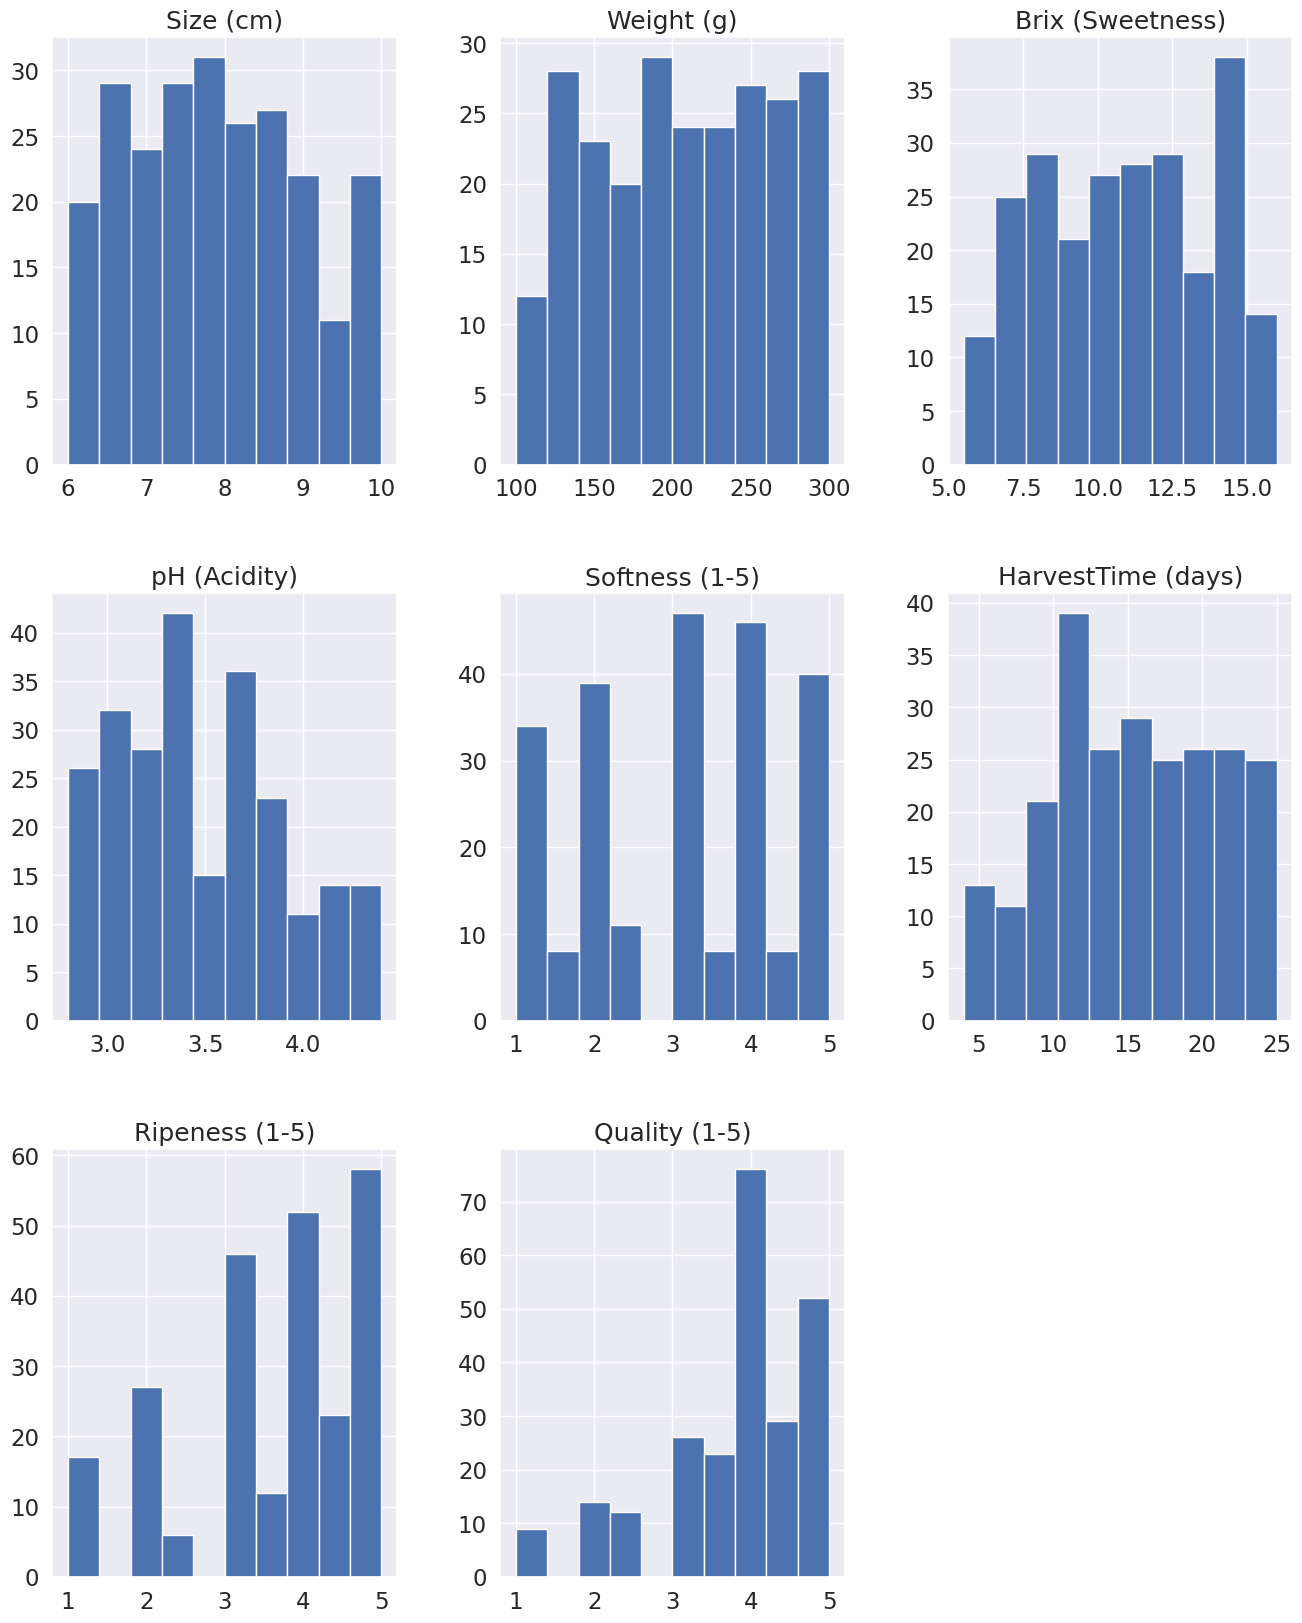

In [ ]:
### 숫자형 변수들만 먼저 살펴봅니다.
### numerical features
numerical_columns=['Size (cm)',	'Weight (g)',	'Brix (Sweetness)',	'pH (Acidity)',	'Softness (1-5)',	'HarvestTime (days)',	'Ripeness (1-5)',	'Quality (1-5)']

### figsize()는 plot()의 기본 크기를 지정합니다.
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

### gca()
### gca()로 현재의 Axes로 현재의 Figure 객체를 구할 수 있다.

df[numerical_columns].hist(ax=ax)
plt.show()

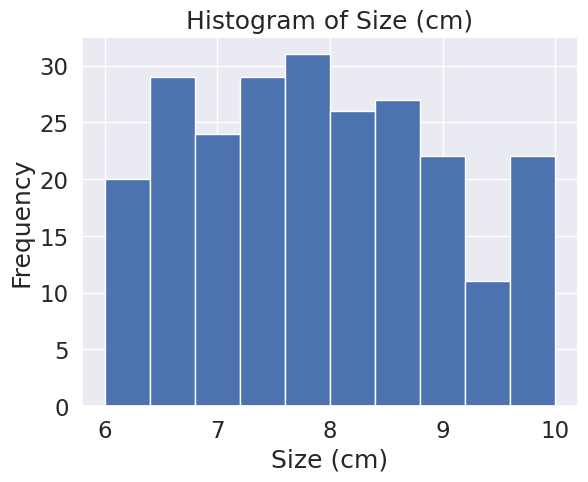

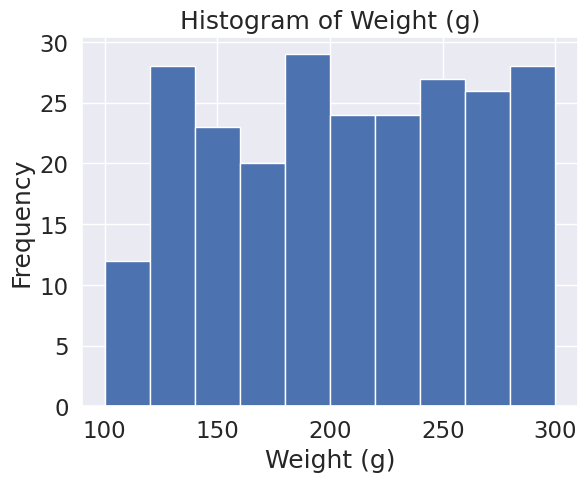

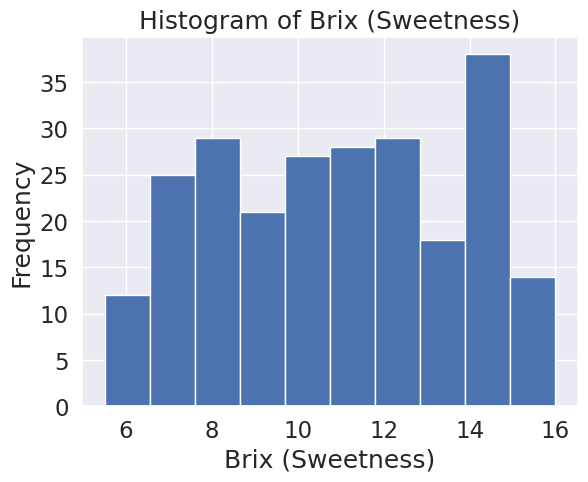

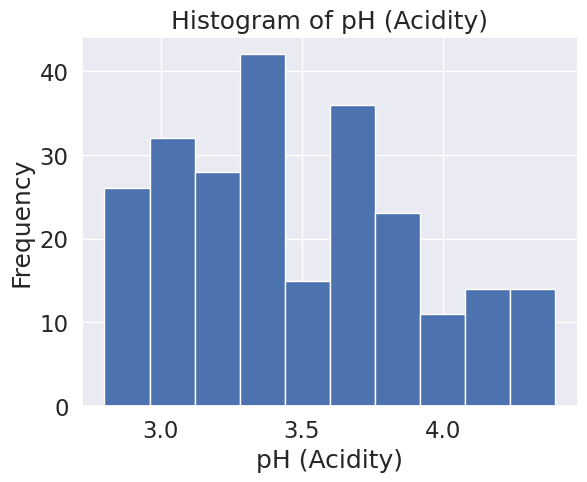

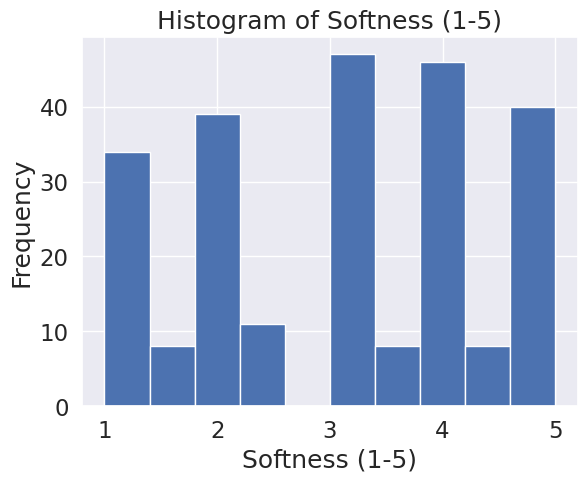

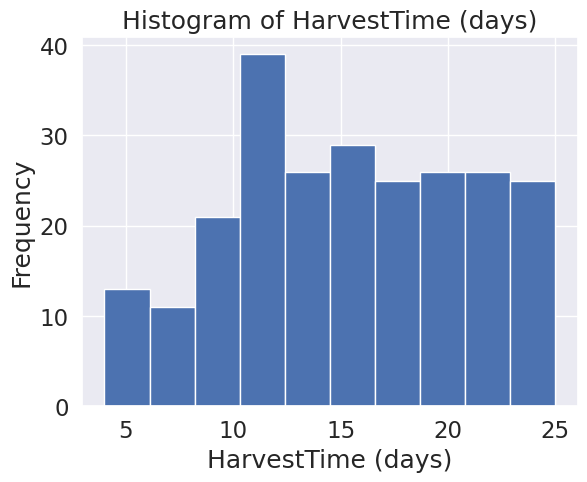

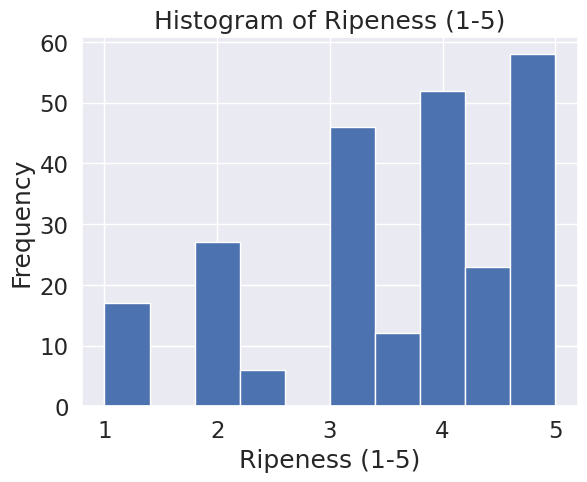

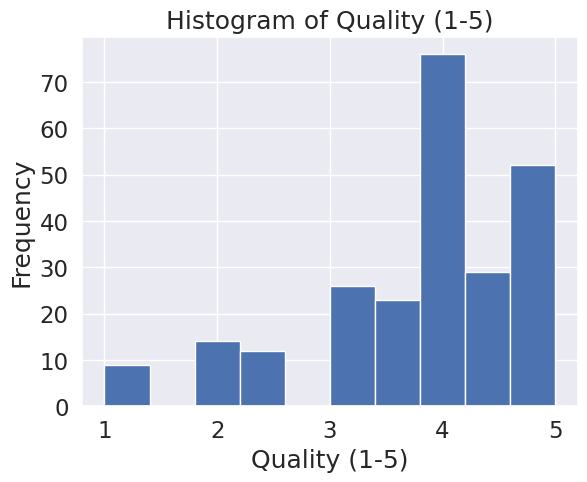

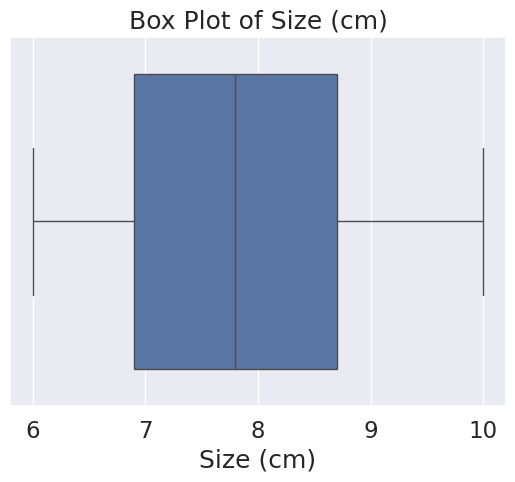

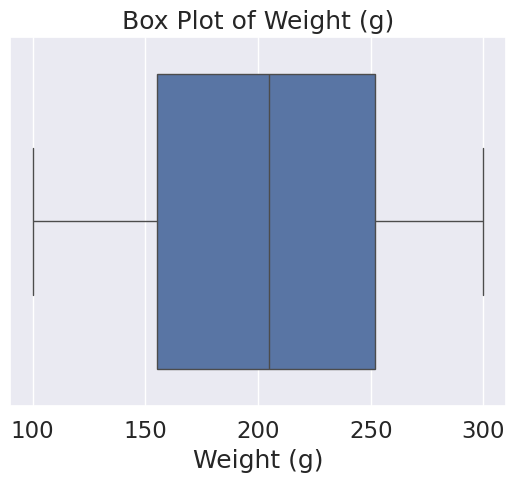

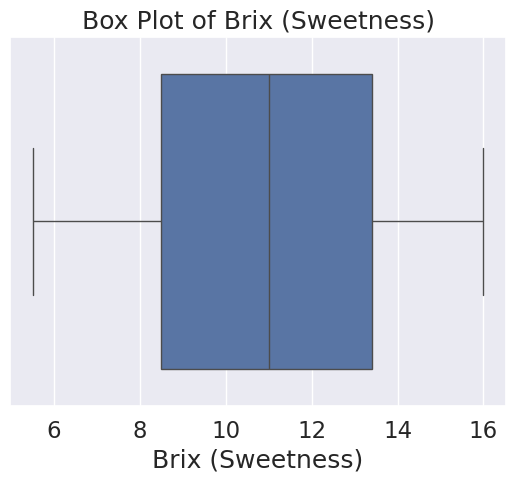

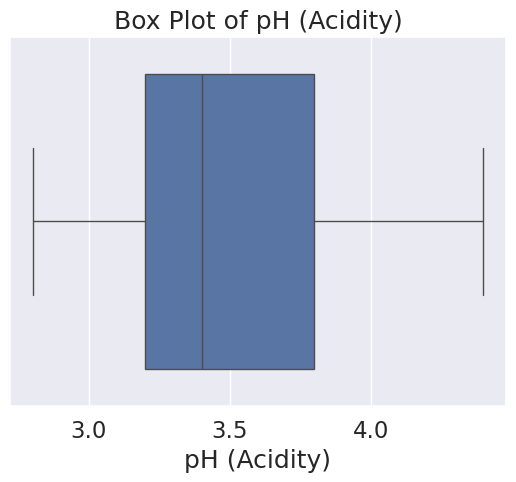

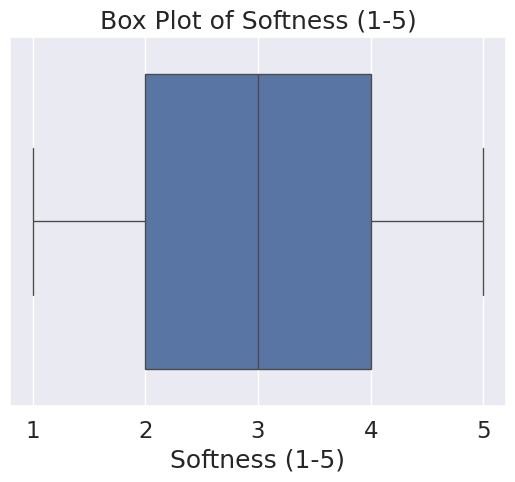

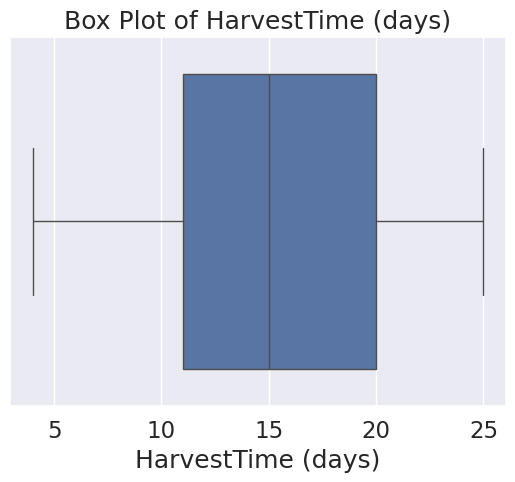

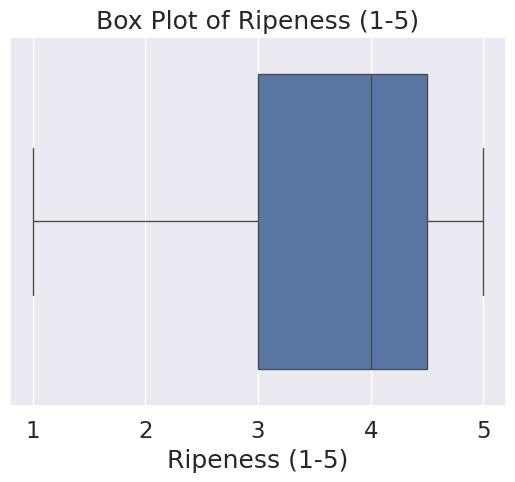

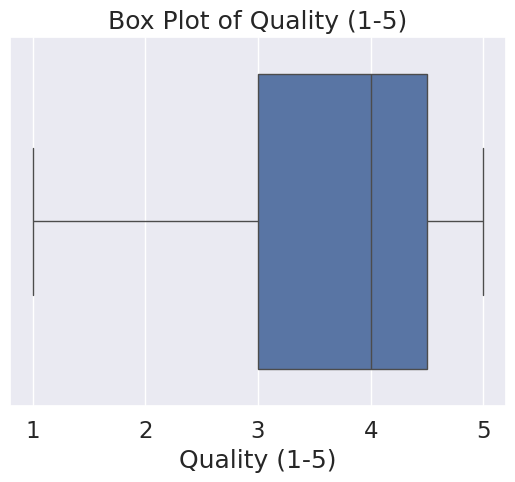

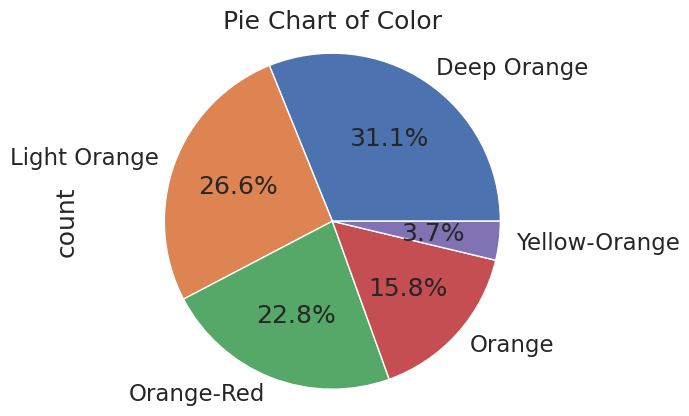

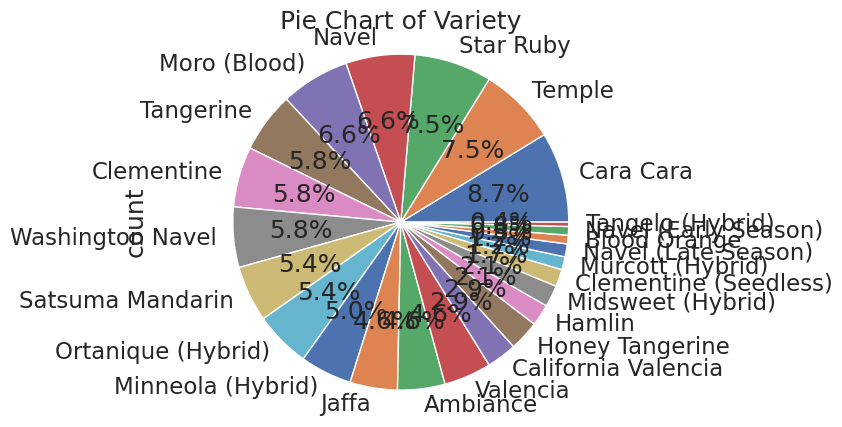

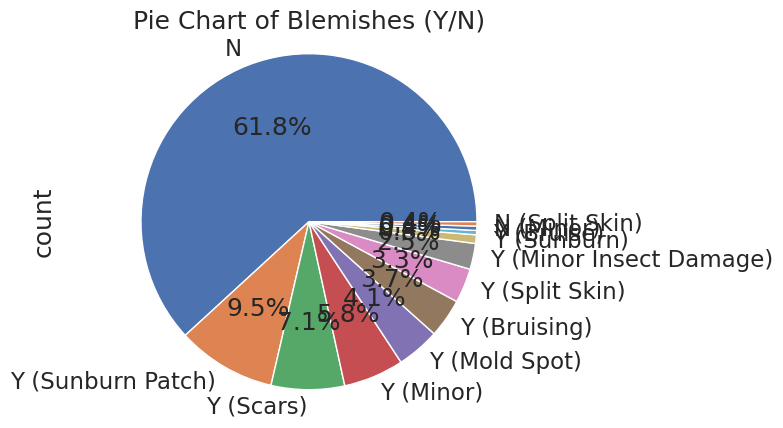

In [ ]:
### 히스토그램
numeric_columns = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)']
for column in numeric_columns:
    plt.hist(df[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)
    plt.show()

### 박스플랏
for column in numeric_columns:
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.title('Box Plot of ' + column)
    plt.show()

### 등등 기본적인 데이터 시각화 진행
### 원 그래프
categorical_columns = ['Color', 'Variety', 'Blemishes (Y/N)']
for column in categorical_columns:
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Pie Chart of ' + column)
    plt.show()

종속변수(목표변수) 탐색

<Axes: >

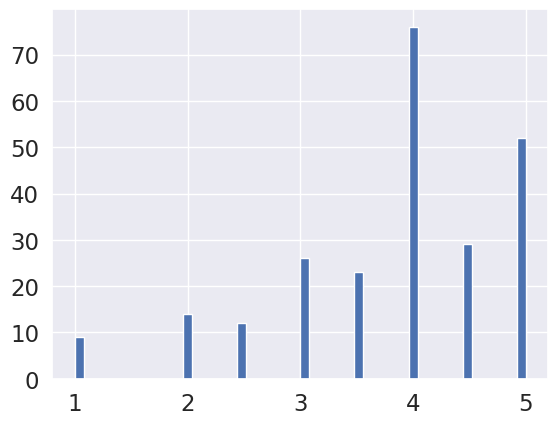

In [ ]:
# 종속변수 시각화
df['Quality (1-5)'].hist(bins=50)

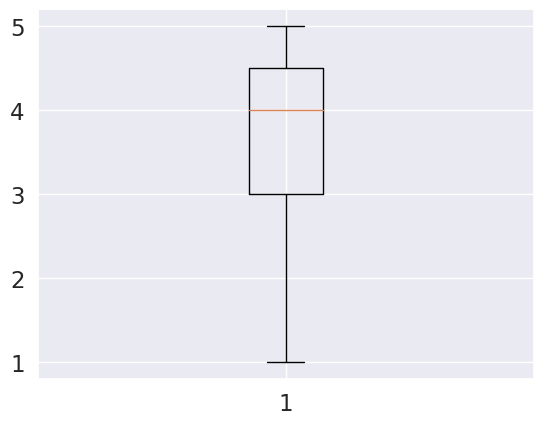

In [ ]:
# 종속변수 시각화 [박스플랏]
plt.boxplot(df['Quality (1-5)'])
plt.show()

(해석) 퀄리티 점수가 3.5~4.5 사이에 대부분 존재한다. 평균은 약 4점이다.

컬럼 간 상관관계 탐색

In [ ]:
cols = ['Quality (1-5)', 'Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)']

corr = df[cols].corr(method = 'pearson')
corr

,Quality (1-5),Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5)
Quality (1-5),1.000000,-0.243113,-0.330268,0.631343,-0.321942,-0.302732,-0.474754,0.280764
Size (cm),-0.243113,1.000000,0.305348,-0.305865,0.330487,0.236863,0.313330,-0.256665
Weight (g),-0.330268,0.305348,1.000000,-0.239659,0.303806,0.316806,0.374670,-0.260454
Brix (Sweetness),0.631343,-0.305865,-0.239659,1.000000,-0.300080,-0.344376,-0.329862,0.144666
pH (Acidity),-0.321942,0.330487,0.303806,-0.300080,1.000000,0.360222,0.262461,-0.232627
Softness (1-5),-0.302732,0.236863,0.316806,-0.344376,0.360222,1.000000,0.331103,-0.202404
HarvestTime (days),-0.474754,0.313330,0.374670,-0.329862,0.262461,0.331103,1.000000,-0.268691
Ripeness (1-5),0.280764,-0.256665,-0.260454,0.144666,-0.232627,-0.202404,-0.268691,1.000000


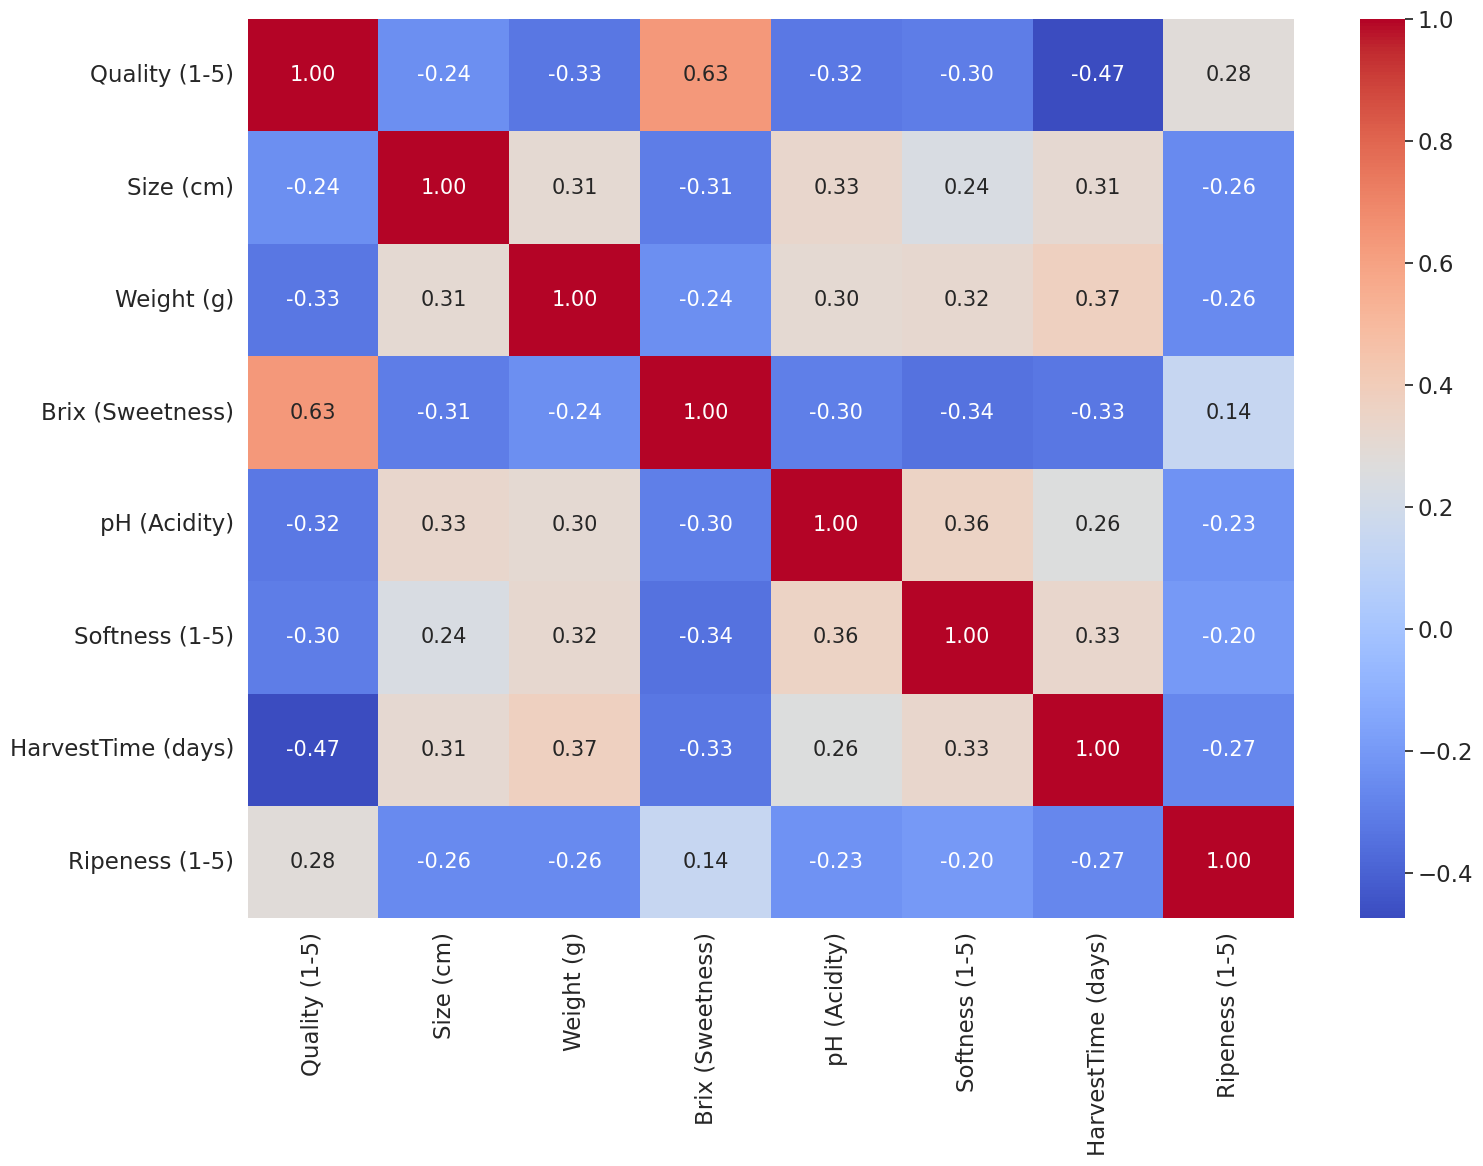

In [ ]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "coolwarm")
plt.tight_layout()

(해석) 오렌지의 퀄리티와 당도가 강한 양의 상관관계를 보이고 있다. \\
음의 상관관계를 살펴보면, 수확시기가 가장 강한 음의 상관관계를 보이고 있다.

In [ ]:
### Pearson 상관계수
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
pearson_corr = correlation_matrix['Quality (1-5)']
print(pearson_corr)

Size (cm)            -0.243113
Weight (g)           -0.330268
Brix (Sweetness)      0.631343
pH (Acidity)         -0.321942
Softness (1-5)       -0.302732
HarvestTime (days)   -0.474754
Ripeness (1-5)        0.280764
Quality (1-5)         1.000000
Name: Quality (1-5), dtype: float64


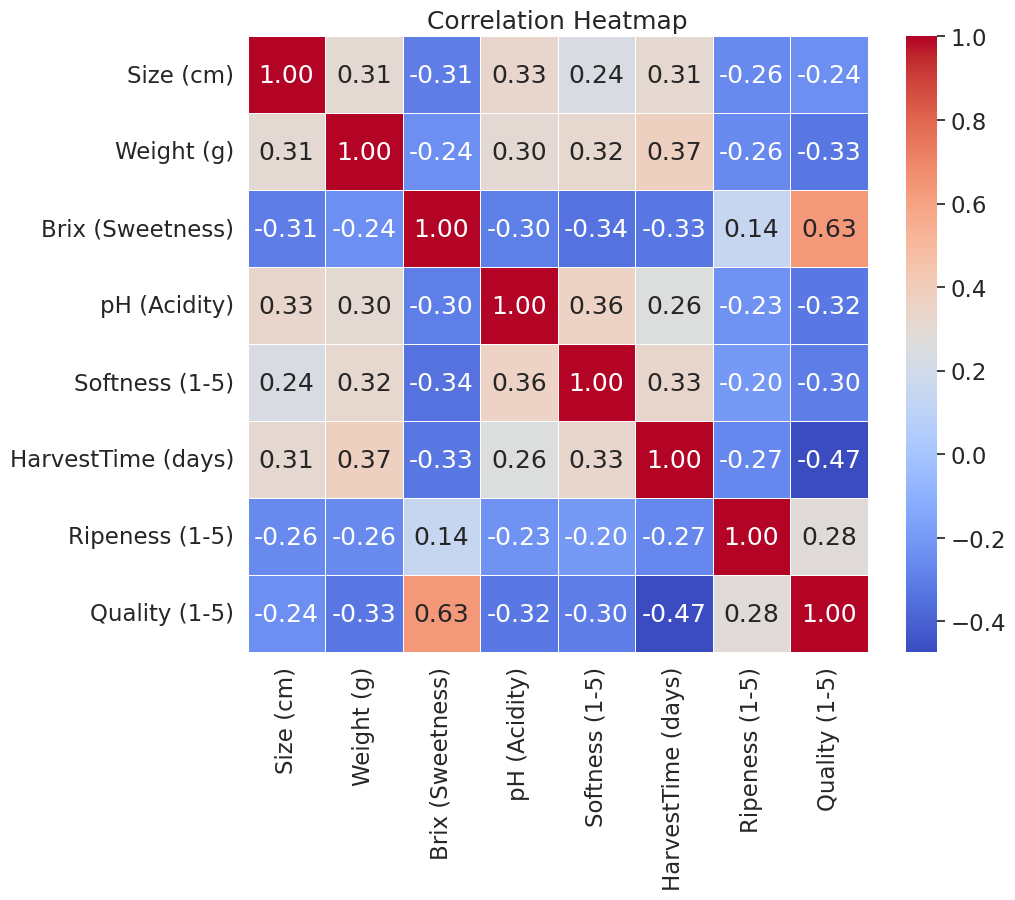

In [ ]:
### 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

특성들간의 관계 해석
1. 크기와 무게 : 크기와 무게의 상관관계는 양이며, 오렌지가 클수록 무게가 많이 나가는 경향이 있다.
2. 브릭스와 품질 : 브릭스와 품질 등급 사이에는 상대적으로 강한 양의 상관관계가 있다. 당도가 높은 오렌지가 더 높은 품질을 가진다.
3. 산도와 품질 : 산도와 품질 사이에 중간정도의 음의 상관관계가 있다. 산도가 낮은 오랜지가 품질 등급이 높은 경향이 있다.
4. 수확 시기와 품질 : 수확 후 일수와 품질 등급 사이에 음의 상관관계가 있다. 최근에 수확한 오렌지 품질 등급이 더 높은 경향이 있으며, 오렌지 신선도와 관련이 있음을 예상할 수 있다.
5. 부드러움과 품질 : 부드러움과 품질 사이에 중간정도의 음의 상관관계가 있다. 무를수록 오렌지의 품질이 낮은 것으로 보인다.
6. 브릭스와 산도 : 브릭스와 산도 사이에 중간정도의 음의 상관관계가 있다. 이는 단 오렌지일수록 산도가 낮음을 의미한다.
7. 크기와 브릭스, 당도: 크기와 브릭스 사이에는 약한 음의 상관관계가 있고, 크기와 산도 사이에는 약한 양의 상관관계가 있다. 오렌지가 클수록 약간 덜 달고, 산도가 약간 높은 경향이 있음을 의미한다.

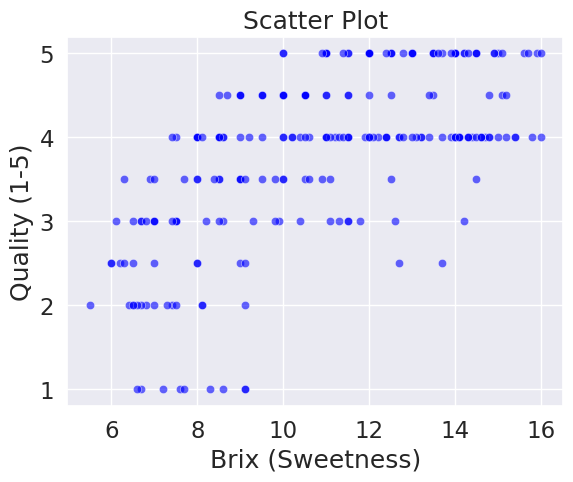

In [ ]:
### 상관관계가 비교적 뚜렷하게 나타나는 당도와 수확시기 살펴보기
# 산점도
sns.scatterplot(data=df, x='Brix (Sweetness)', y='Quality (1-5)', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

당도가 높을 수록 오렌지의 퀄리티 점수가 높은 것을 확인할 수 있다.

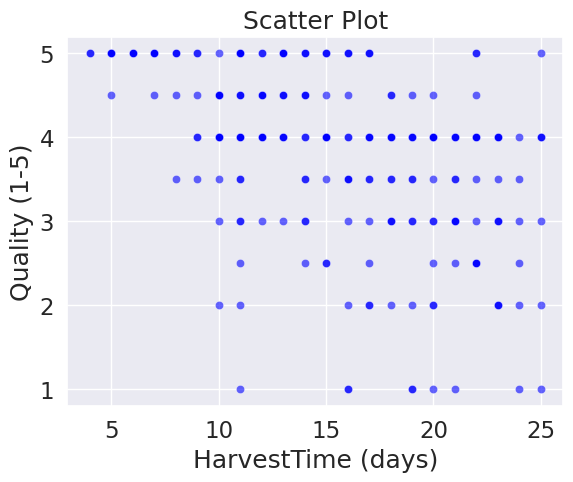

In [ ]:
sns.scatterplot(data=df, x='HarvestTime (days)', y='Quality (1-5)', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

상관관계가 뚜렷하진 않지만, 수확한 시기가 길어질수록(수확한지 오래될수록) 비교적 오렌지의 퀄리티가 떨어짐을 확인 할 수 있음

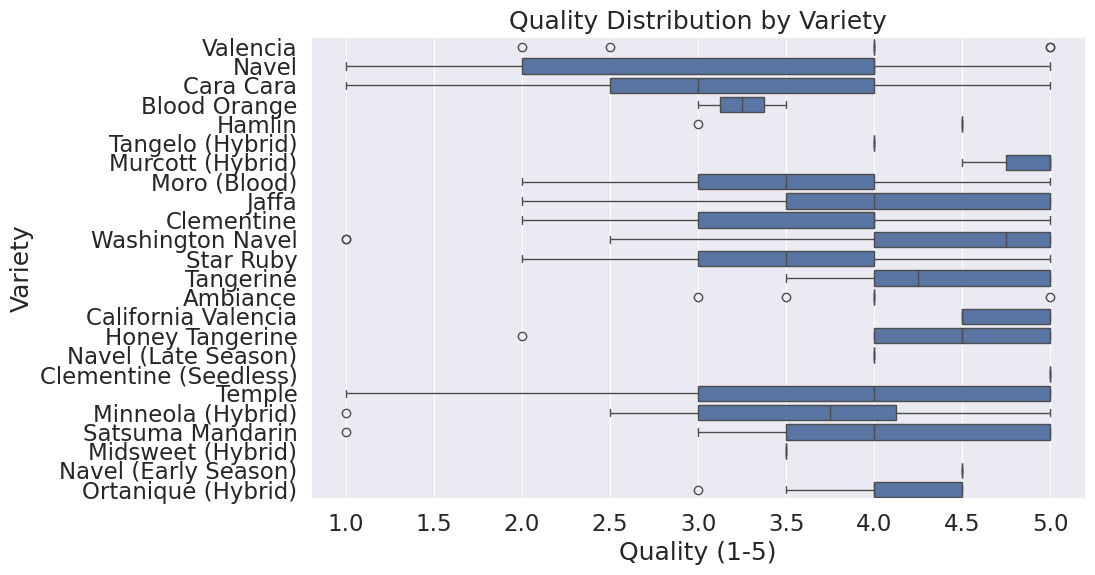

In [ ]:
# 품종별 퀄리티 차이
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality (1-5)', y='Variety', data=df)
plt.title('Quality Distribution by Variety')
plt.xlabel('Quality (1-5)')
plt.ylabel('Variety')
plt.show()

In [ ]:
# 품종에 따른 특성 살펴보기(상위 5개만)
variety_types = df['Variety'].value_counts().head(5).index.tolist()
top_data = df[df['Variety'].isin(variety_types)]
variety_stats = top_data.groupby('Variety')[['Size (cm)',	'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']].agg(['mean', 'median'])
print("Mean/Median Values by Variety Type:")
print(variety_stats)

Mean/Median Values by Variety Type:
             Size (cm)         Weight (g)        Brix (Sweetness)         \
                  mean median        mean median             mean median   
Variety                                                                    
Cara Cara     8.419048   8.90  227.095238  240.0         9.371429   8.50   
Moro (Blood)  8.475000   8.75  225.562500  242.5         9.943750   8.25   
Navel         7.662500   7.60  205.875000  202.0        10.712500  11.05   
Star Ruby     8.444444   9.00  224.833333  257.5        10.322222  10.75   
Temple        7.638889   7.70  220.222222  200.5        11.016667  11.15   

             pH (Acidity)        Softness (1-5)        Ripeness (1-5)         \
                     mean median           mean median           mean median   
Variety                                                                        
Cara Cara        3.755714   3.97       4.023810   4.50       3.357143   3.00   
Moro (Blood)     3.891250   3.90   

몇가지 특성들에 대한 해석
1. 브릭스 :
'Temple' 품종은 평균 브릭스(11.02)가 가장 높아 상위 품종 중 가장 단맛이 강한 것으로 나타남.
'Navel' 품종도 평균 브릭스가 10.71로 비교적 높다.
'Cara Cara' 품종은 상위 5개 품종 중 평균 브릭스(9.37)가 가장 낮아 평균적으로 단맛이 떨어질 수 있음을 알 수 있다.

2.  pH(산도):
'Moro (Blood)' 품종은 평균 pH(3.89)가 가장 높아 다른 품종에 비해 산도가 다소 낮다.
'Star Ruby' 품종은 평균 pH(3.34)가 가장 낮아 평균적으로 더 산성일 수 있음을 알 수 있다.

3. 부드러움(1-5):
'Cara Cara' 품종은 평균 Softness 등급(4.02)이 가장 높아 다른 품종에 비해 부드러운 것으로 보임.
'Navel' 품종은 가장 낮은 평균 등급(2.63)을 가지고 있어 평균적으로 더 견고한 것으로 보인다.

4. 숙성도(1-5):
'Cara Cara' 품종은 평균 숙성도 등급(3.36)이 가장 높아 다른 품종에 비해 숙성도가 높다.
'Moro (Blood)' 품종은 평균 숙성도 등급(2.59)이 가장 낮아 평균적으로 덜 익은 것으로 보인다.

5. 품질(1-5):
'Temple'과 'Star Ruby' 품종은 평균 품질 등급이 가장 높아(각각 3.64, 3.61) 상위 품종 중 전체 품질이 가장 높다.
'Cara Cara' 품종은 평균 품질 등급(3.19)이 가장 낮아 다른 상위 품종에 비해 전반적으로 품질이 낮다


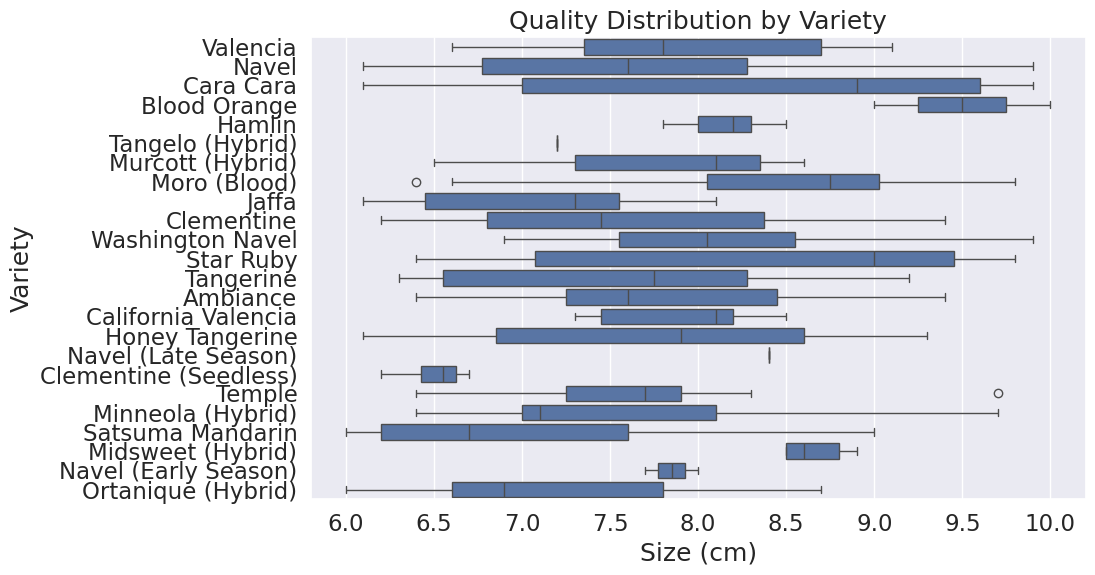

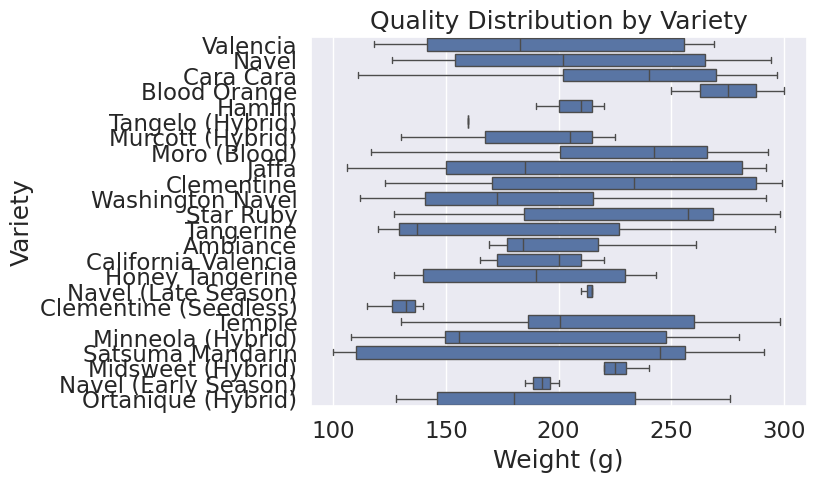

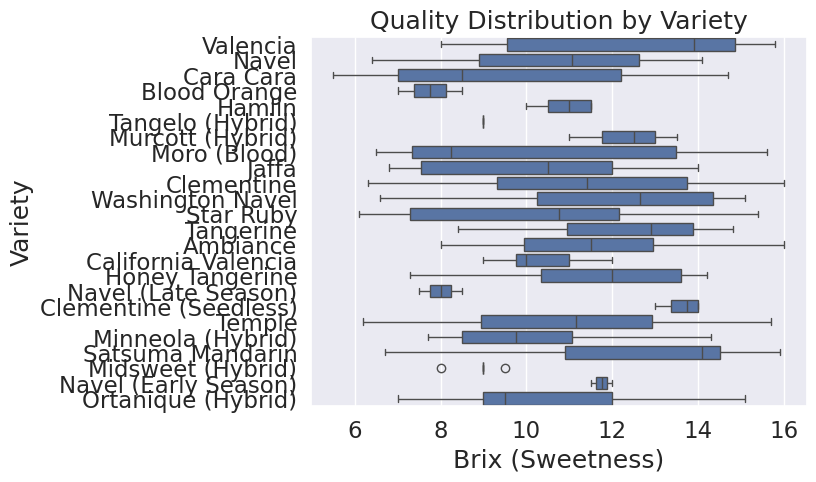

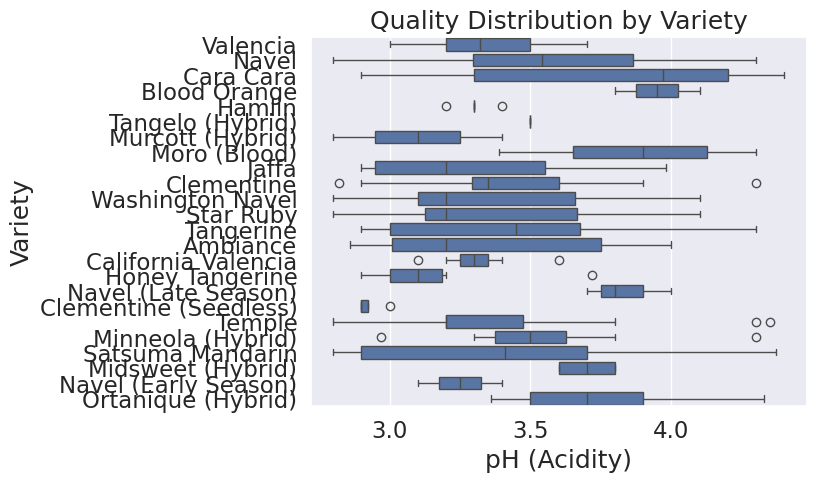

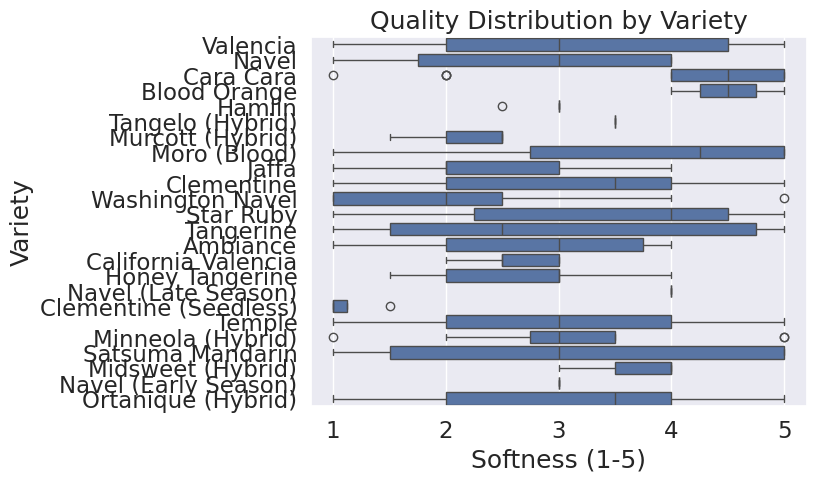

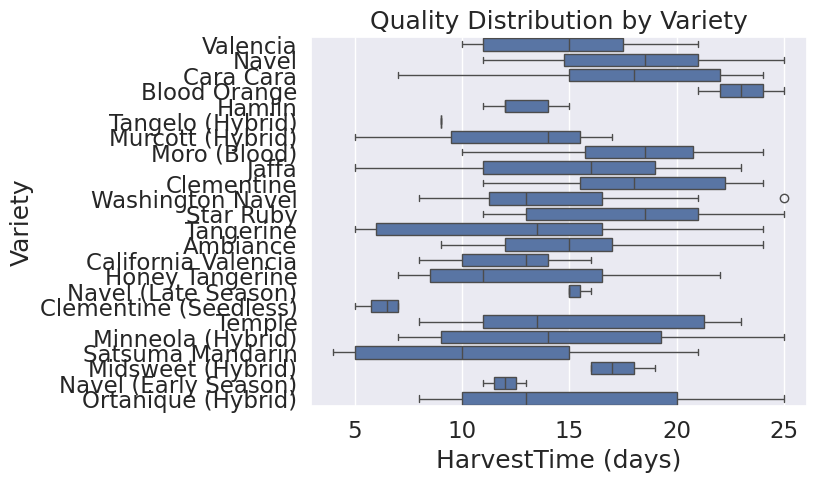

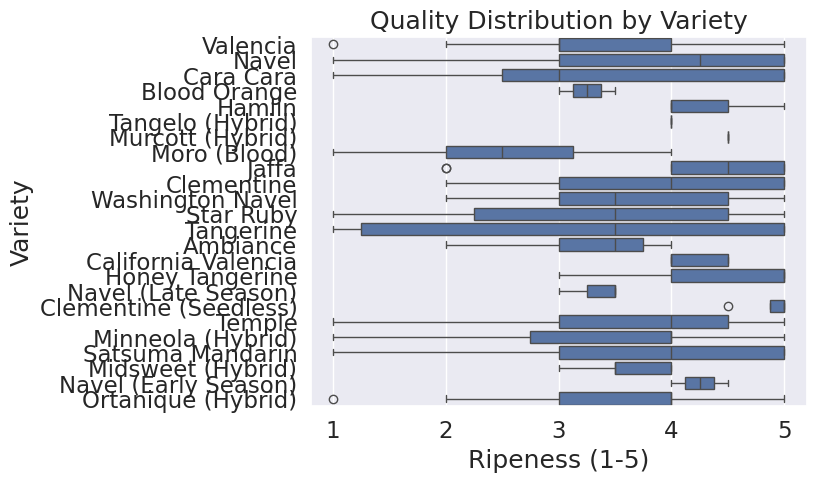

In [ ]:
# 품종별 오렌지 특성 차이 시각화
value = ['Size (cm)',	'Weight (g)',	'Brix (Sweetness)',	'pH (Acidity)',	'Softness (1-5)',	'HarvestTime (days)',	'Ripeness (1-5)']
plt.figure(figsize=(10, 6))
for i in value:
  sns.boxplot(x= i, y='Variety', data=df)
  plt.title('Quality Distribution by Variety')
  plt.xlabel(i)
  plt.ylabel('Variety')
  plt.show()

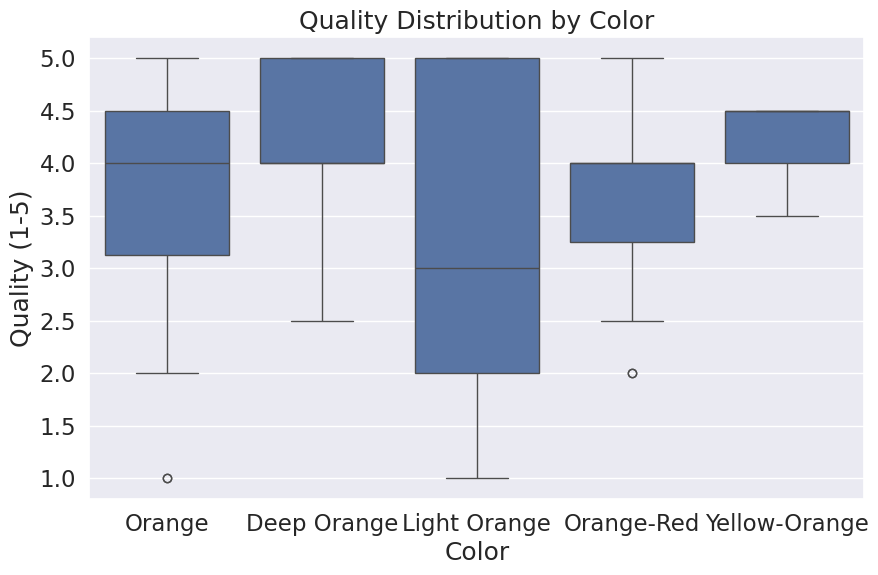

In [ ]:
# 색상별 퀄리티 차이
plt.figure(figsize=(10, 6))
sns.boxplot(x='Color', y='Quality (1-5)', data=df)
plt.title('Quality Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Quality (1-5)')
plt.show()

In [ ]:
# 색상에 따른 특성 살펴보기
color_types = df['Color'].value_counts().head(5).index.tolist()
top_data = df[df['Color'].isin(color_types)]
color_stats = top_data.groupby('Color')[['Size (cm)',	'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']].agg(['mean', 'median'])
print("Mean/Median Values by color Type:")
print(color_stats)

Mean/Median Values by color Type:
              Size (cm)         Weight (g)        Brix (Sweetness)         \
                   mean median        mean median             mean median   
Color                                                                       
Deep Orange    7.830667    7.8  208.973333  205.0        12.849333  13.20   
Light Orange   7.510937    7.2  191.375000  169.5         9.451562   8.60   
Orange         7.907895    8.0  206.763158  207.0        10.402632  10.75   
Orange-Red     8.301818    8.8  221.872727  238.0        10.461818  10.50   
Yellow-Orange  7.277778    7.2  161.666667  160.0         9.944444   9.50   

              pH (Acidity)        Softness (1-5)        Ripeness (1-5)         \
                      mean median           mean median           mean median   
Color                                                                           
Deep Orange       3.464000   3.30       2.773333    2.5       3.480000    4.0   
Light Orange      3.34937

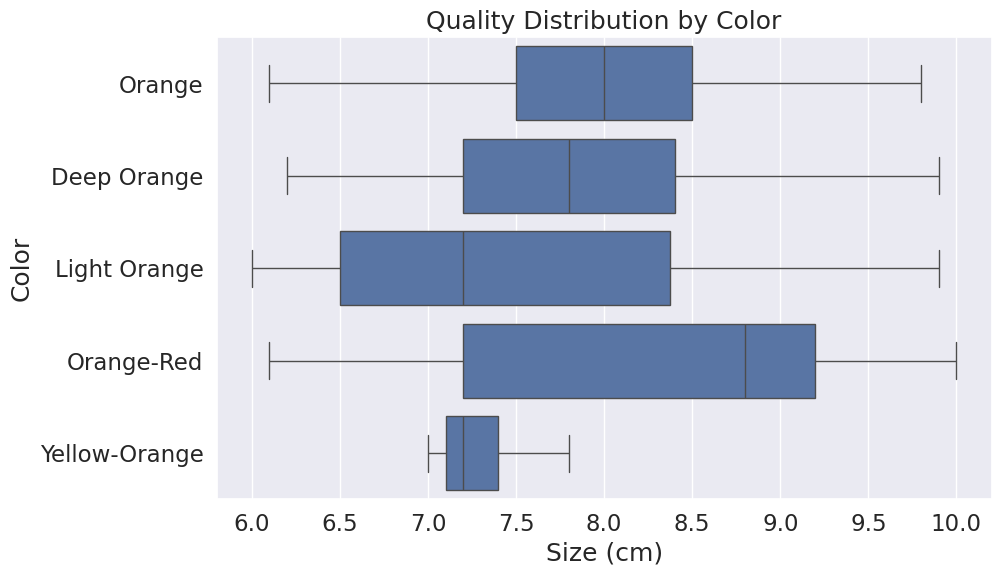

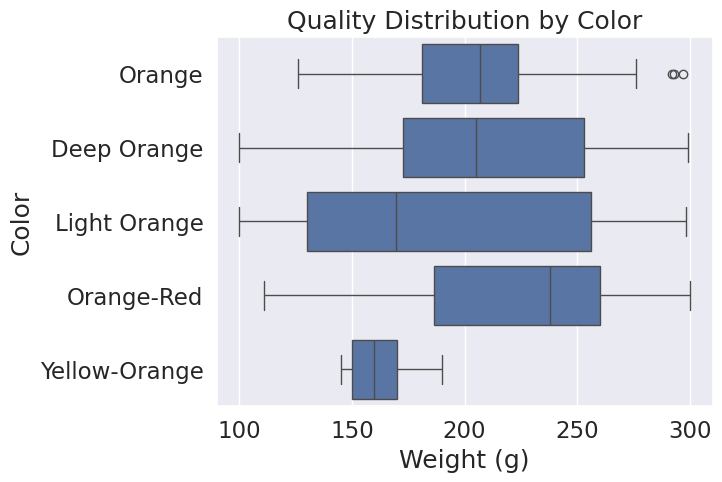

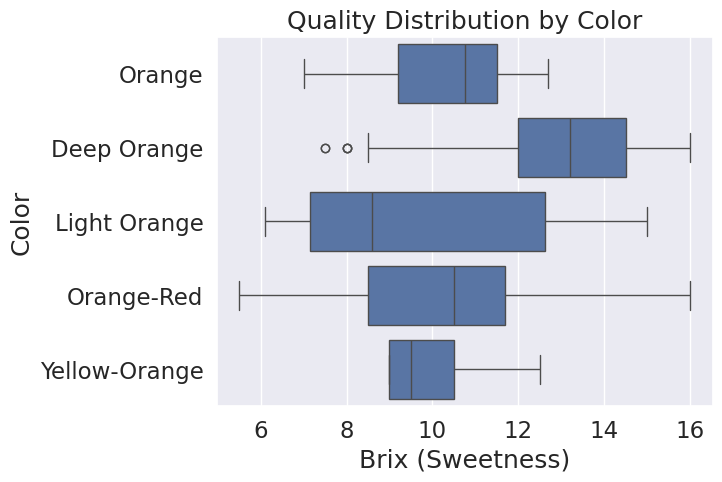

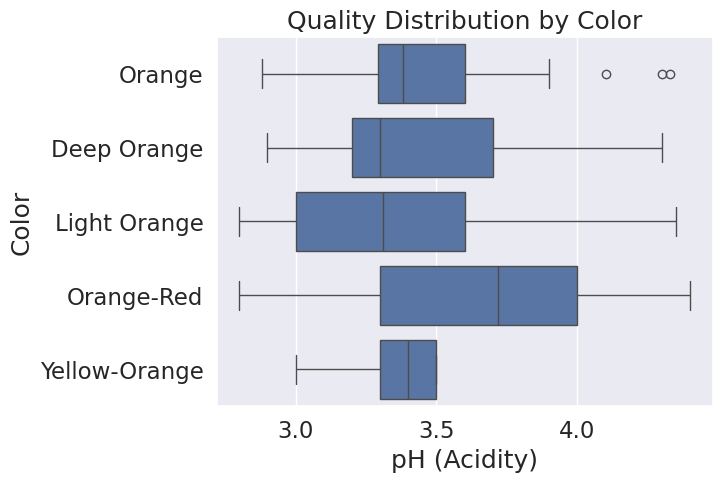

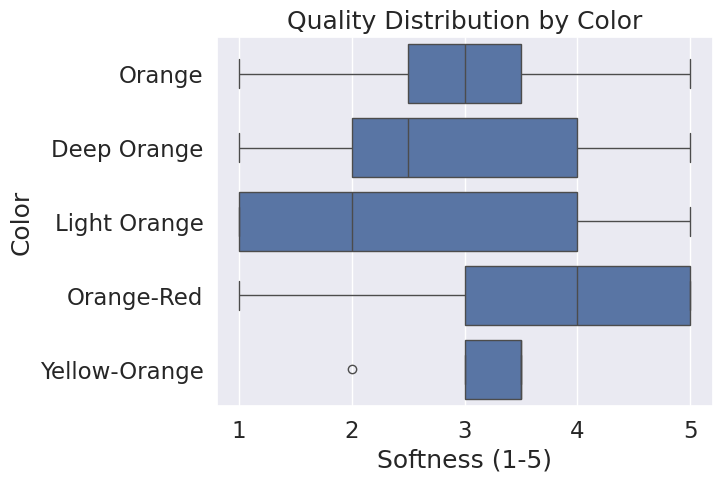

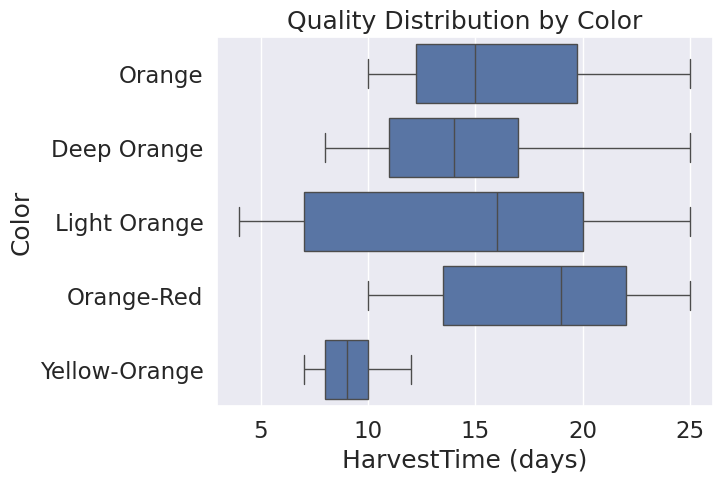

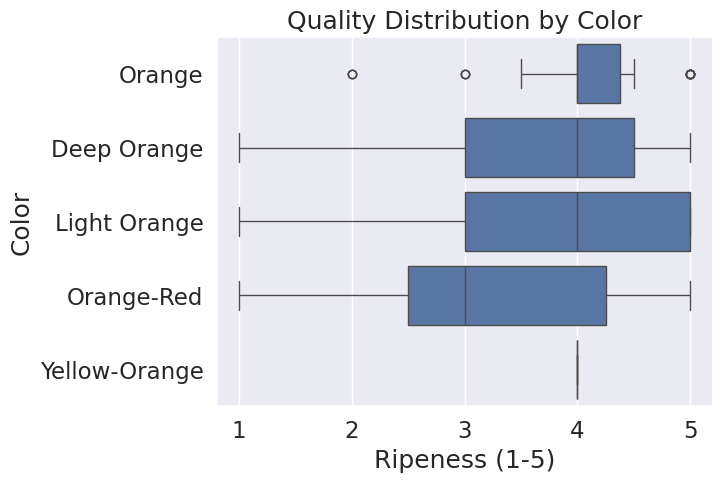

In [ ]:
# 색상별 오렌지 특성 차이 시각화
value = ['Size (cm)',	'Weight (g)',	'Brix (Sweetness)',	'pH (Acidity)',	'Softness (1-5)',	'HarvestTime (days)',	'Ripeness (1-5)']
plt.figure(figsize=(10, 6))
for i in value:
  sns.boxplot(x= i, y='Color', data=df)
  plt.title('Quality Distribution by Color')
  plt.xlabel(i)
  plt.ylabel('Color')
  plt.show()

몇가지 특성들에 대한 해석
1. 브릭스 : 'Deep Orange'색상의 오렌지의 평균 브릭스(12.8)가 가장 높아 딥 오렌지 색상을 가진 오렌지가 평균적으로 더 단것으로 나타남.
2. pH(산도) : 'Orange-Red'색상의 오렌지가 평균 산도(3.68)가 가장 높아 평균적으로 산성이 더 약하다는 것을 알 수 있다.
3. 부드러움(1-5) :  'Orange-Red'색상의 오렌지가 부드러운 정도(3.98)가 가장 높아 'Orange-Red'색상의 오렌지가 평균적으로 더 부드럽다.
4. 숙성도(1-5) : 'Yellow-Orange' 색상의 오렌지의 숙성도(4.0)가 가장 높다.
5. 퀄리티(1-5) : 전반적으로 'Deep Orange'색상의 오렌지가 평균 퀄리티(4.30)가 높다는 것을 알 수 있다.


In [ ]:
# 흠집에 따른 특성 살펴보기
top_blemish_types = df['Blemishes (Y/N)'].value_counts().head(5).index.tolist()
top_data = df[df['Blemishes (Y/N)'].isin(top_blemish_types)]
blemish_stats = top_data.groupby('Blemishes (Y/N)')[['Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']].agg(['mean', 'median'])
print("Mean/Median Values by Blemish Type:")
print(blemish_stats)

Mean/Median Values by Blemish Type:
                  Brix (Sweetness)        pH (Acidity)        Softness (1-5)  \
                              mean median         mean median           mean   
Blemishes (Y/N)                                                                
N                        11.022148  11.00     3.382148   3.30       2.986577   
Y (Minor)                11.357143  11.45     3.571429   3.45       2.178571   
Y (Mold Spot)             9.930000   9.20     3.908000   3.89       4.000000   
Y (Scars)                10.441176  10.00     3.585882   3.60       3.382353   
Y (Sunburn Patch)        10.078261   9.30     3.505652   3.40       3.086957   

                         Ripeness (1-5)        Quality (1-5)         
                  median           mean median          mean median  
Blemishes (Y/N)                                                      
N                   3.00       3.906040   4.00      3.993289   4.00  
Y (Minor)           2.00       3.357143   3

특성 해석
1. 브릭스 : 'Y(마이너)' 결함이 있는 오렌지는 평균 브릭스(11.36)가 가장 높아 평균적으로 더 달콤하게 인식 될 수 있다.
또한 'Y(Mold Spot)' 잡티가 있는 오렌지는 평균 브릭스(9.93)가 가장 낮아 다른 흠집이 있는 오렌지에 비해 단맛이 떨어진다.
2. pH(산도) : 'Y(Mold Spot)' 잡티가 있는 오렌지는 평균 pH(3.91)가 가장 높아 산도가 평균적으로 낮다. 또한 잡티가 없는 오렌지('N')는 평균 pH(3.38)가 가장 낮아 다른 잡티 유형에 비해 약간 더 산성일 수 있다.
3. 부드러움(1-5) : 'Y(Mold Spot)' 결함이 있는 오렌지는 평균 등급(4.00)이 가장 높아 평균적으로 더 부드럽다. 'Y(Minor)' 결함이 있는 오렌지는 평균 등급(2.18)이 가장 낮아 다른 결함 유형에 비해 더 단단하다.
4. 숙성도(1-5) : 잡티가 없는 오렌지('N')는 평균 숙성도 등급(3.90)이 가장 높다. 또한 'Y(Sunburn Patch)' 결함이 있는 오렌지는 평균 숙성도 등급(2.91)이 가장 낮아 다른 결함 유형에 비해 덜 익은 것으로 확인된다.


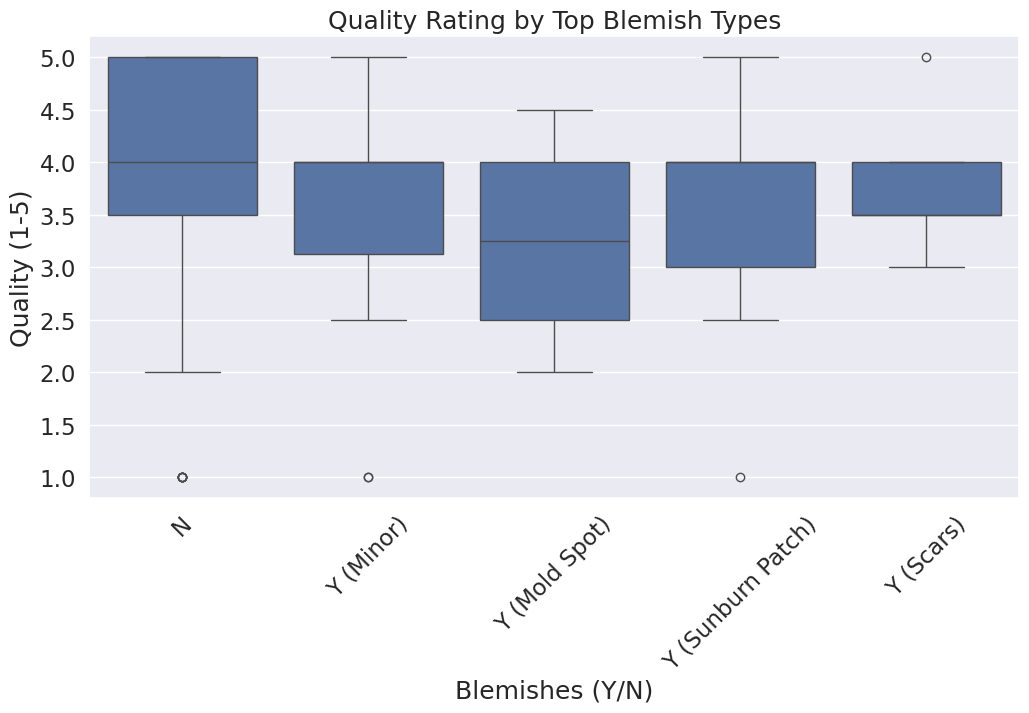

In [ ]:
# 흠집에 따른 품질 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='Blemishes (Y/N)', y='Quality (1-5)', data=top_data)
plt.xticks(rotation=45)
plt.title('Quality Rating by Top Blemish Types')
plt.show()


- 잡티가 없는 오렌지('N')는 평균 품질 등급(3.99)이 가장 높아 잡티가 없는 것이 더 높은 품질임을 의미한다.

- 'Y(Mold Spot)' 결함이 있는 오렌지는 평균 품질 등급(3.20)이 가장 낮으며, 이는 곰팡이 반점의 존재가 전반적인 품질 등급에 영향을 미친다는 것을 의미한다.

- 'Y(흉터)'와 'Y(선번패치)'의 잡티가 있는 오렌지는 잡티가 없는 오렌지에 비해 상대적으로 평균 품질등급(각각 3.74, 3.52)을 가진다.


데이터 전처리

In [ ]:
### 컬럼마다 특성을 확인후, 전처리 해야 할 부분을 진행

In [ ]:
# 흠집 여부 원핫 인코딩
# Blemishes 컬럼을 이진화
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].apply(lambda x: 1 if isinstance(x, str) and 'Y' in x else 0)
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,1,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,1,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,1,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),1,3.0


In [ ]:
# 색상, 품종 label incording
# LabelEncoder를 객체로 생성
le = LabelEncoder()
# fit_transform()으로 라벨인코딩을 수행
df['Color'] = le.fit_transform(df['Color'])
df['Variety'] = le.fit_transform(df['Variety'])
# 라벨인코딩이 잘 되었는지 확인
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,1,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,1,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,1,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,1,3.0


In [ ]:
# 색상, 품종 label incording (예시로 적은것, 필요에 따라 전처리 다르게 진행해주셔도 괜찮습니다.)
# Color와 Variety 컬럼에 원-핫 인코딩 적용
#df = pd.get_dummies(df, columns=['Color', 'Variety']).astype(int)
#df = pd.get_dummies(df, columns=['Color']).astype(int)
#df

In [ ]:
# 이상치 처리
# 제 1 사분위수(Q1)와 제 3 사분위수(Q3) 계산

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)

# # IQR 계산
# IQR = Q3 - Q1

# # 이상치 경계 설정
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # 이상치 탐지
# outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# # 이상치 제거
# cleaned_df = df[~outliers]

# print("이상치가 제거된 데이터프레임:")
# print(cleaned_df)

# 히스토그램과 박스플랏을 살펴본 결과, 딱히 이상치라고 할만한 데이터가 보이지 않아 이상치 제거는 일단 주석 처리 해두었습니다.
# 제거된 데이터 프레임의 개수도 이전과 동일한 것을 확인할 수 있습니다.

In [ ]:
#이상치가 제거된 데이터 확인
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,1,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,1,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,1,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,1,3.0


In [ ]:
# # 크기, 무게, 산도, 당도, 수확시기 특성 스케일
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# features_scale = df[['Size (cm)', 'Weight (g)', 'pH (Acidity)', 'Brix (Sweetness)', 'HarvestTime (days)']]

# 표준화 (Standardization)
# scaler = StandardScaler()
# scaled_features_standardized = scaler.fit_transform(features_scale)
# scaled_standardized = pd.DataFrame(scaled_features_standardized, columns=features_scale.columns)

# # 정규화 (Normalization)
# scaler = MinMaxScaler()
# scaled_features_normalized = scaler.fit_transform(features_scale)
# scaled_normalized = pd.DataFrame(scaled_features_normalized, columns=features_scale.columns)

# print("표준화된 특성:")
# print(scaled_standardized)
# print("\n정규화된 특성:")
# print(scaled_normalized)

**모델링**
-
-
-
-


In [ ]:
# 설명변수
final_columns = ['Size (cm)', 'Weight (g)',	'Brix (Sweetness)', 'pH (Acidity)',	'Softness (1-5)',	'HarvestTime (days)',	'Ripeness (1-5)',	'Color', 'Variety',	'Blemishes (Y/N)']

In [ ]:
# 종속변수 분리
X = df[final_columns]
y = df['Quality (1-5)']

In [ ]:
# 랜덤포레스트 모델링 (그리드서치, 교차검증)
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 회귀 모델 초기화
rf = RandomForestRegressor(random_state=42)

# 튜닝할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# K-fold 교차 검증 설정
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# GridSearchCV를 사용하여 모델 훈련 및 평가
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='r2')
grid_search.fit(X, y)

# 최적의 모델 및 파라미터 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 각 폴드에서의 훈련 세트 R-squared 값 출력
print("Train R-squared values:")
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = grid_search.best_estimator_.fit(X_train, y_train)
    train_r2 = r2_score(y_train, model.predict(X_train))
    print(f"Fold {i+1}: {train_r2}")

# 최적의 모델로 테스트 세트 예측 및 평가
best_model = grid_search.best_estimator_
pred_test = best_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, pred_test)
print(f'Mean Squared Error: {mse}')

# 테스트 세트에서의 R-squared 값
test_r2 = r2_score(y_test, pred_test)
print("테스트 세트의 R-squared 값:", test_r2)

# 최적의 모델의 특성 중요도 저장
feature_importances = best_model.feature_importances_
np.save('feature_importances.npy', feature_importances)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.549966182665662
Train R-squared values:
Fold 1: 0.9207113370472698
Fold 2: 0.9221635834489884
Fold 3: 0.931276522746768
Fold 4: 0.9095011493012518
Fold 5: 0.9077007256567201
Mean Squared Error: 0.4687251631754013
테스트 세트의 R-squared 값: 0.6181249024200408


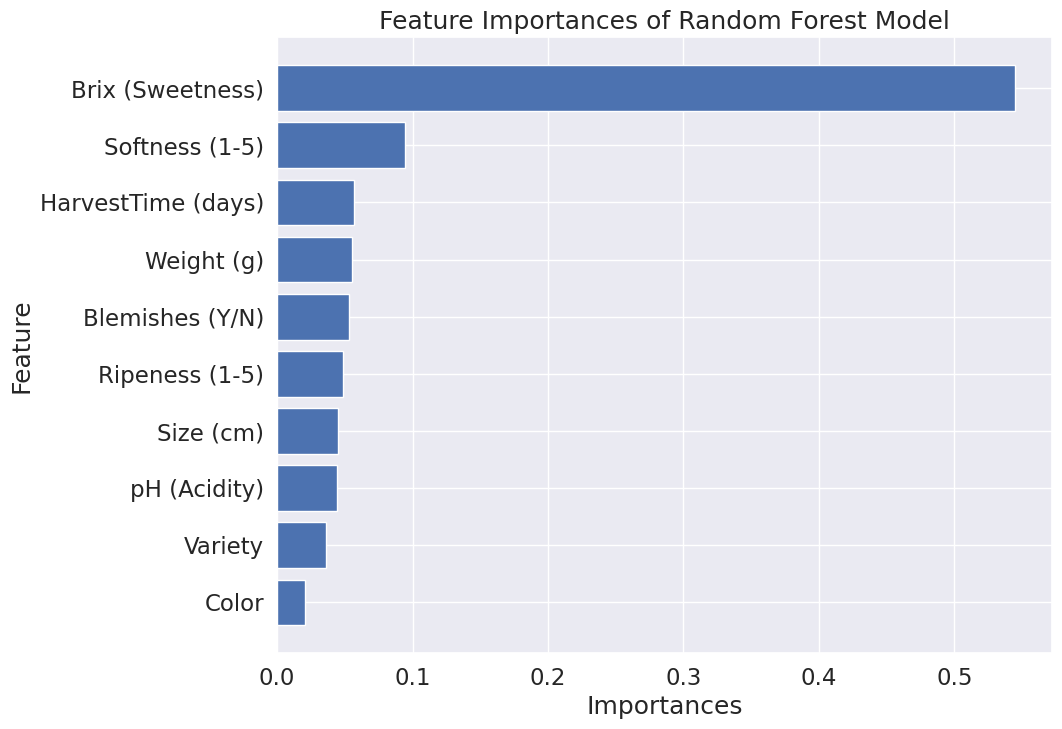

In [ ]:
# 저장된 특성 중요도 로드
feature_importances = np.load('feature_importances.npy')

# 특성 중요도를 기준으로 내림차순 정렬
indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in indices]

# 랜덤 포레스트 모델의 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, feature_importances[indices])
plt.title('Feature Importances of Random Forest Model')
plt.xlabel('Importances')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # y축 역순으로 설정하여 상위 변수가 위에 오도록 함
plt.show()

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

#Decision Tree
dectree = DecisionTreeClassifier(random_state=42)
dectree.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 50, 100]
}

# 그리드 서치 객체 생성(교차검증 포함)
grid_search = GridSearchCV(estimator=dectree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# 그리드 서치 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 최적의 하이퍼파라미터로 모델 생성
best_tree = grid_search.best_estimator_

# 최적의 모델로 학습 및 예측
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)

# 모델 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters: {'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Accuracy: 1.0


In [ ]:
# 예측 결과 확인
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head())

   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1


             Feature  Importance
2  petal length (cm)    0.564056
3   petal width (cm)    0.422611
0  sepal length (cm)    0.013333
1   sepal width (cm)    0.000000


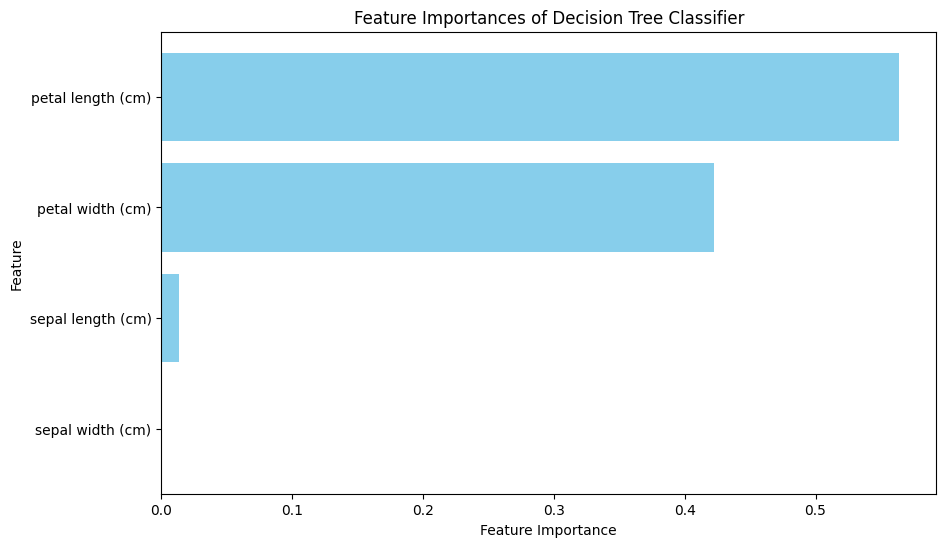

In [ ]:
feature_names = iris.feature_names

# 특성 중요도 계산
feature_importances = dectree.feature_importances_

# 특성 중요도를 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 출력
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Decision Tree Classifier')
plt.gca().invert_yaxis()  # y축 순서 뒤집기 (가장 중요한 특성이 위로 오게 하기 위해)
plt.show()

- 특성 중요도 결과 해석

1. petal length (cm)와 petal width (cm)가 주요 분류 기준으로 사용되었습니다. 이는 이 두 특성이 장 중요한 역할을 한다는 것을 알 수 있습니다.

2. sepal length (cm)와 sepal width (cm)도 분류에 기여하지만 상대적으로 중요도가 낮음을 확인할 수 있습니다.

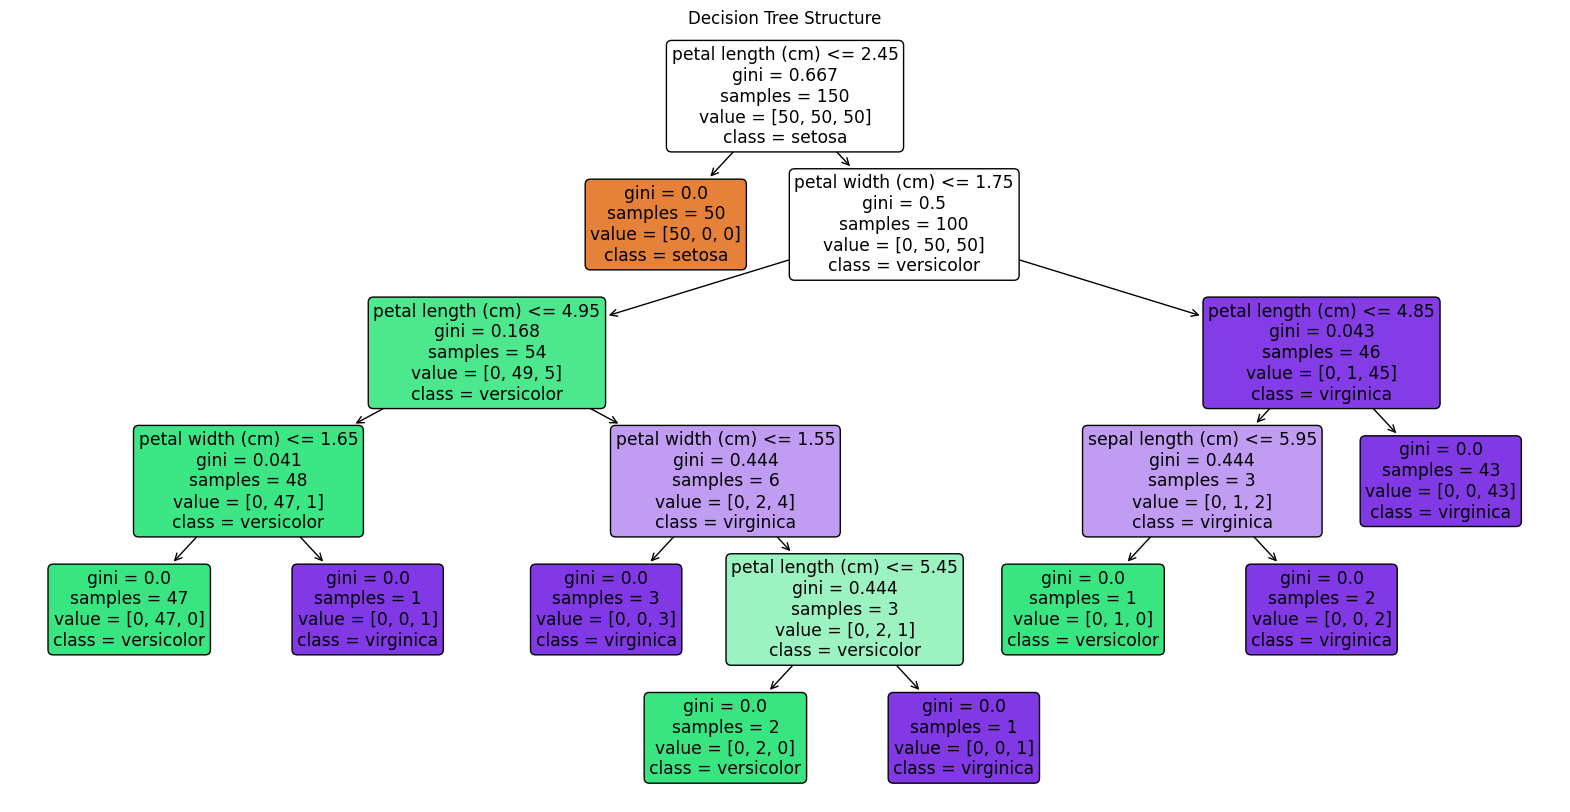

In [ ]:
from sklearn.tree import plot_tree

# 트리 구조 시각화
plt.figure(figsize=(20, 10))
plot_tree(dectree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

- 트리구조 결과 해석

1. 루트 노드는 petal length (cm) <= 2.45로, 주요 분류 기준입니다. 이 조건을 만족하는 모든 데이터는 Setosa로 분류됩니다.

2. 이후 노드에서는 주로 petal width (cm)와 petal length (cm)를 기준으로 Versicolor와 Virginica를 분류합니다.

- 기대효과

1. 오렌지의 품질을 예측함으로 시장에서의 경쟁력을 갖출 수 있고, 공급되는 오렌지의 품질에 따라 적절한 가격 정책을 설정할 수 있다.

2. 오렌지의 품질 표준을 준수하는 데 도움이 되고 자원 낭비를 줄여 효율적인 생산 및 유통 관리를 할 수 있다.



-  Rotation Forest 최신 scikit-learn version에서 작동하지 않음.
- https://github.com/Liam-E2/RotationForest/issues/1